In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

import keras

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
from keras.datasets import imdb

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz", num_words=None,
                                                      skip_top=0, maxlen=None,
                                                      start_char=1, oov_char=2,
                                                      index_from=3)

17465344/17464789 [==============================] - 16s 1us/step


In [3]:
print("Training set:", x_train.shape, y_train.shape)
print("Evaluation set:", x_test.shape, y_test.shape)

print("Example:", x_train[0], y_train[0])

Training set: (25000,) (25000,)
Evaluation set: (25000,) (25000,)
Example: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 11

In [4]:
def plot_distribution(data, labels):
    plt.style.use('ggplot')
    
    # distribution of text lengths
    lengths = np.array([len(row) for row in data])
    summary = "mean: "+str(int(np.mean(lengths)))+" , min/max: "+str(np.min(lengths))+"/"+str(np.max(lengths))+" (95%: "+ str(round(np.percentile(lengths, 95), 2)) + ")"
    plt.figure(1, figsize=(10,6))
    plt.hist(lengths, bins='auto')
    plt.title("Distribution of text lengths")
    plt.xlabel("Text Length: " + summary); plt.ylabel("Examples")
    plt.axvline(np.mean(lengths), ls="-", color="k")
    plt.axvline(np.percentile(lengths, 95), ls="--", color="k")
    plt.xlim(0, int(np.percentile(lengths, 99)))
    plt.show()
    
    # distribution of label counts
    labels = [str(label) for label in labels]
    plt.figure(2, figsize=(10,4))
    plt.hist(labels, bins='auto')
    plt.title("Distribution of labels")
    plt.xlabel("Labels"); plt.ylabel("Examples")
    plt.show()

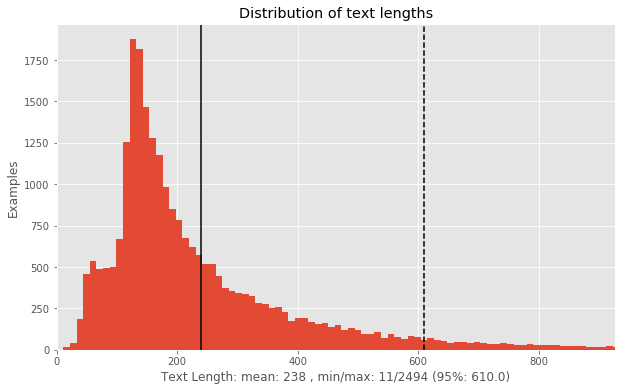

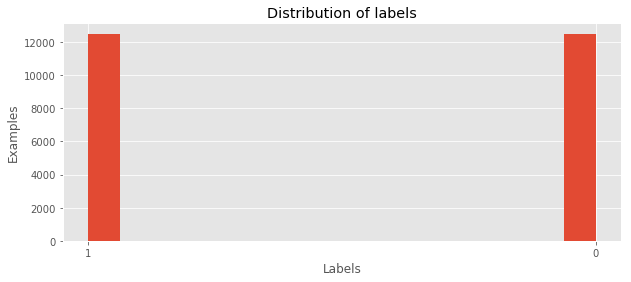

In [5]:
plot_distribution(x_train, y_train)

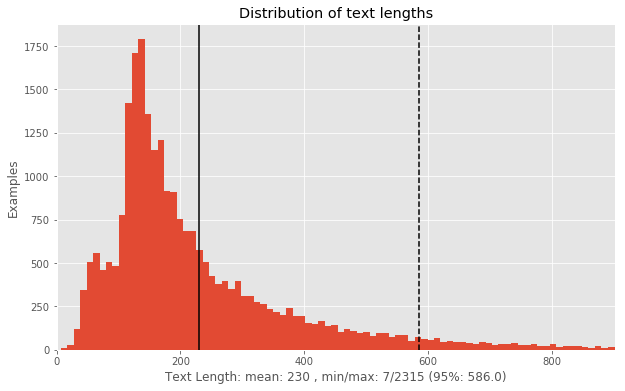

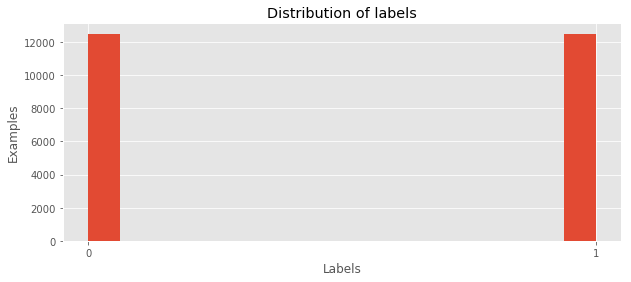

In [6]:
plot_distribution(x_test, y_test)